# 1. Load Data

-----------

In [2]:
#installing the necessary libraries
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data_Collection\spotify_christmas_streams_kworb_2017_2025.csv') #loads dataset data
df.head() #shows first 5

,date,track,artist,streams,day_of_week,week_of_year
0,2017-11-16,All I Want for Christmas Is You,Mariah Carey,3821572,Thursday,46
1,2017-11-23,All I Want for Christmas Is You,Mariah Carey,6130250,Thursday,47
2,2017-11-23,Last Christmas,Wham!,4040197,Thursday,47
3,2017-11-30,All I Want for Christmas Is You,Mariah Carey,11641888,Thursday,48
4,2017-11-30,It's Beginning to Look a Lot Like Christmas,Michael Bublé,4577042,Thursday,48


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  #pd.to_datetime converts to date
df['date'].dtype #<M8[ns] is NumPy's internal format for datetime64 with nanosecond precision.

dtype('<M8[ns]')

# 2. Complete Time Series Analysis (2017-2025)

-----------

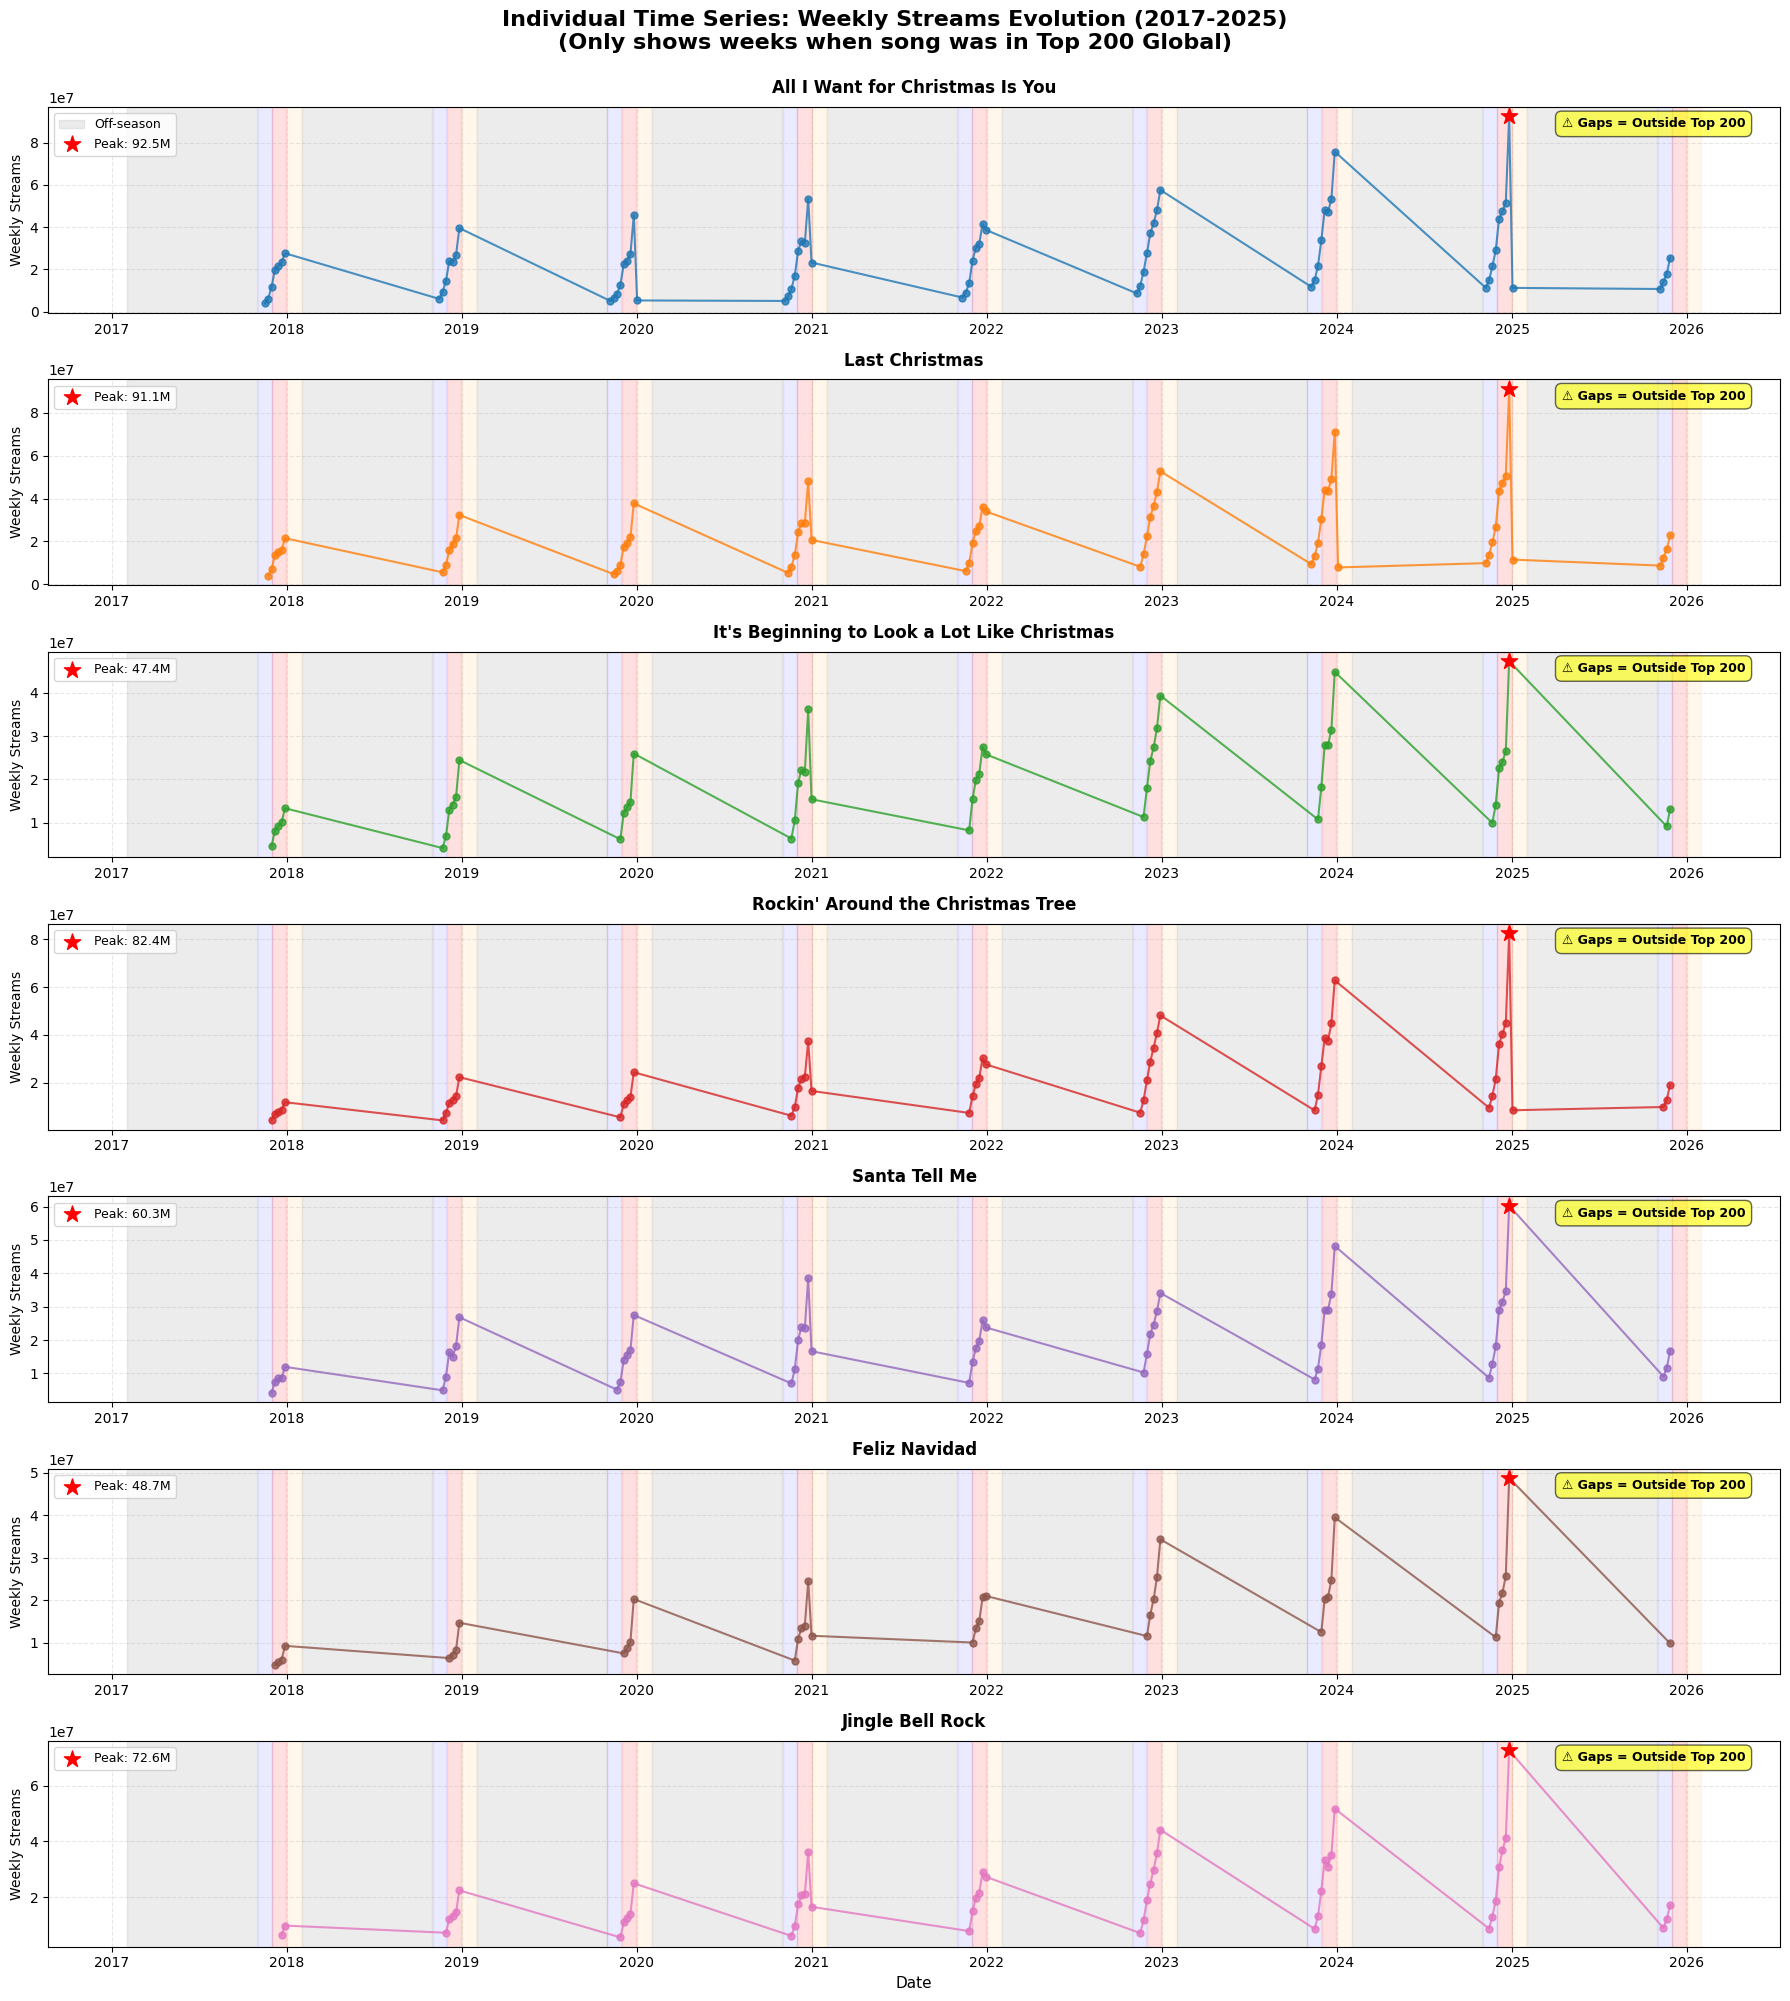

In [6]:
# Individual time series analysis for each song
fig, axes = plt.subplots(7, 1, figsize=(18, 20))

songs = df['track'].unique()
colors = plt.cm.tab10(range(len(songs)))

for idx, song in enumerate(songs):
    song_data = df[df['track'] == song].sort_values('date')
    
    # Plot with line connection AND markers
    axes[idx].plot(song_data['date'], song_data['streams'], 
                   marker='o', markersize=5, linewidth=1.5, 
                   color=colors[idx], alpha=0.8, zorder=3)
    
    axes[idx].set_title(f'{song}', fontsize=12, fontweight='bold', pad=10)
    axes[idx].set_ylabel('Weekly Streams', fontsize=10)
    axes[idx].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    
    # Mark OFF-SEASON periods (February to October) with gray background
    for year in range(2017, 2026):
        axes[idx].axvspan(pd.Timestamp(f'{year}-02-01'), pd.Timestamp(f'{year}-10-31'), 
                          color='gray', alpha=0.15, zorder=0, label='Off-season' if year == 2017 and idx == 0 else '')
    
    # Highlight Christmas season months (November, December, January)
    for year in range(2017, 2026):
        # November
        axes[idx].axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year}-11-30'), 
                          color='blue', alpha=0.08, zorder=1)
        # December
        axes[idx].axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year}-12-31'), 
                          color='red', alpha=0.12, zorder=1)
        # January
        axes[idx].axvspan(pd.Timestamp(f'{year+1}-01-01'), pd.Timestamp(f'{year+1}-01-31'), 
                          color='orange', alpha=0.08, zorder=1)
    
    # Highlight maximum peak
    max_idx = song_data['streams'].idxmax()
    max_date = song_data.loc[max_idx, 'date']
    max_streams = song_data.loc[max_idx, 'streams']
    axes[idx].scatter(max_date, max_streams, color='red', s=150, zorder=5, 
                      marker='*', label=f'Peak: {max_streams/1e6:.1f}M')
    axes[idx].legend(loc='upper left', fontsize=9)
    
    # Add clear note
    axes[idx].text(0.98, 0.95, '⚠ Gaps = Outside Top 200', 
                   transform=axes[idx].transAxes, fontsize=9, 
                   ha='right', va='top', weight='bold',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.6))

axes[-1].set_xlabel('Date', fontsize=11)

plt.suptitle('Individual Time Series: Weekly Streams Evolution (2017-2025)\n(Only shows weeks when song was in Top 200 Global)', 
             fontsize=16, fontweight='bold', y=0.998)
plt.tight_layout()
plt.show()

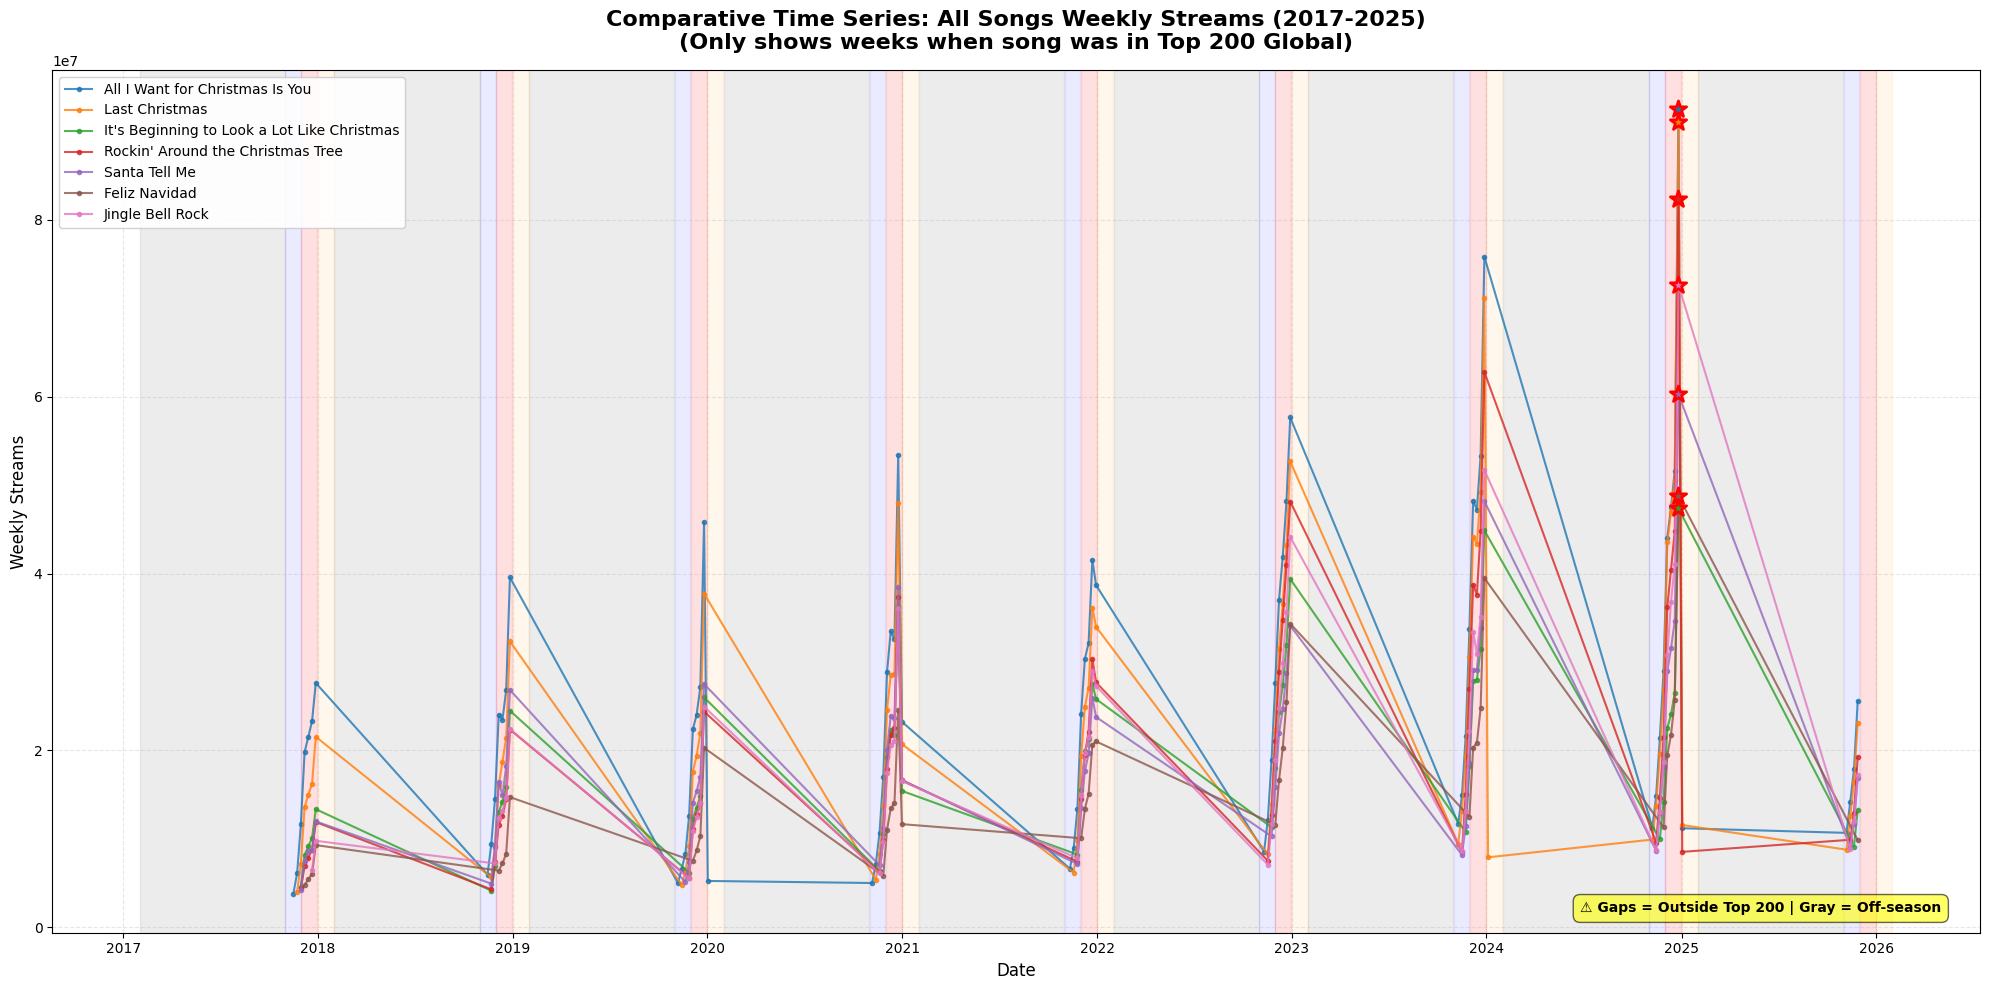

In [7]:
# Comparative time series: all songs overlayed
plt.figure(figsize=(20, 10))

songs = df['track'].unique()
colors = plt.cm.tab10(range(len(songs)))

# Mark OFF-SEASON periods (February to October) with gray background
for year in range(2017, 2026):
    plt.axvspan(pd.Timestamp(f'{year}-02-01'), pd.Timestamp(f'{year}-10-31'), 
                color='gray', alpha=0.15, zorder=0)

# Highlight Christmas season months (November, December, January)
for year in range(2017, 2026):
    # November
    plt.axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year}-11-30'), 
                color='blue', alpha=0.08, zorder=1)
    # December
    plt.axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year}-12-31'), 
                color='red', alpha=0.12, zorder=1)
    # January
    plt.axvspan(pd.Timestamp(f'{year+1}-01-01'), pd.Timestamp(f'{year+1}-01-31'), 
                color='orange', alpha=0.08, zorder=1)

# Plot all songs
for idx, song in enumerate(songs):
    song_data = df[df['track'] == song].sort_values('date')
    plt.plot(song_data['date'], song_data['streams'], 
             marker='o', markersize=3, linewidth=1.5, 
             label=song, color=colors[idx], alpha=0.8, zorder=3)
    
    # Highlight maximum peak for each song
    max_idx = song_data['streams'].idxmax()
    max_date = song_data.loc[max_idx, 'date']
    max_streams = song_data.loc[max_idx, 'streams']
    plt.scatter(max_date, max_streams, color=colors[idx], s=150, 
                marker='*', zorder=5, edgecolors='red', linewidths=2)

plt.title('Comparative Time Series: All Songs Weekly Streams (2017-2025)\n(Only shows weeks when song was in Top 200 Global)', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Streams', fontsize=12)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')

# Add clear note
plt.text(0.98, 0.02, '⚠ Gaps = Outside Top 200 | Gray = Off-season', 
         transform=plt.gca().transAxes, fontsize=10, 
         ha='right', va='bottom', weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.6))

plt.tight_layout()
plt.show()

In [8]:
# 2.2 Seasonal Pattern of Christmas Cycle

# Filter data for Christmas season (weeks 45-52 + week 1)
christmas_season = df[df['week_of_year'].isin(list(range(45, 53)) + [1])].copy()

# Calculate average streams per week across all years
weekly_avg = christmas_season.groupby(['week_of_year', 'track'])['streams'].mean().reset_index()
weekly_avg_overall = christmas_season.groupby('week_of_year')['streams'].mean().reset_index()

# Sort weeks properly (45-52, then 1)
week_order = list(range(45, 53)) + [1]
weekly_avg['week_of_year'] = pd.Categorical(weekly_avg['week_of_year'], categories=week_order, ordered=True)
weekly_avg = weekly_avg.sort_values('week_of_year')

weekly_avg_overall['week_of_year'] = pd.Categorical(weekly_avg_overall['week_of_year'], categories=week_order, ordered=True)
weekly_avg_overall = weekly_avg_overall.sort_values('week_of_year')

print("Average streams by week during Christmas season:")
print(weekly_avg_overall)

Average streams by week during Christmas season:
  week_of_year       streams
1           45  8.702632e+06
2           46  9.153227e+06
3           47  1.083639e+07
4           48  1.501655e+07
5           49  2.170434e+07
6           50  2.368233e+07
7           51  2.670700e+07
8           52  3.869217e+07
0            1  8.890929e+06


In [9]:
# Define Christmas cycle phases
phases = {
    'Beginning (Nov)': list(range(45, 49)),      # Weeks 45-48 (Early-Mid November)
    'Growth (Dec)': list(range(49, 52)),         # Weeks 49-51 (Late Nov - Mid Dec)
    'Peak (Christmas)': [52],                     # Week 52 (Christmas week)
    'Decline (Post)': [1]                         # Week 1 (Post-Christmas)
}

# Add phase column to dataset
def assign_phase(week):
    for phase_name, weeks in phases.items():
        if week in weeks:
            return phase_name
    return 'Other'

christmas_season['phase'] = christmas_season['week_of_year'].apply(assign_phase)

# Calculate average by phase
phase_avg = christmas_season.groupby(['phase', 'track'])['streams'].mean().reset_index()
phase_order = ['Beginning (Nov)', 'Growth (Dec)', 'Peak (Christmas)', 'Decline (Post)']
phase_avg['phase'] = pd.Categorical(phase_avg['phase'], categories=phase_order, ordered=True)
phase_avg = phase_avg.sort_values(['phase', 'streams'], ascending=[True, False])

print("\nAverage streams by phase:")
print(phase_avg)


Average streams by phase:
               phase                                        track  \
0    Beginning (Nov)              All I Want for Christmas Is You   
4    Beginning (Nov)                               Last Christmas   
5    Beginning (Nov)            Rockin' Around the Christmas Tree   
3    Beginning (Nov)                             Jingle Bell Rock   
6    Beginning (Nov)                                Santa Tell Me   
2    Beginning (Nov)  It's Beginning to Look a Lot Like Christmas   
1    Beginning (Nov)                                Feliz Navidad   
10      Growth (Dec)              All I Want for Christmas Is You   
14      Growth (Dec)                               Last Christmas   
15      Growth (Dec)            Rockin' Around the Christmas Tree   
13      Growth (Dec)                             Jingle Bell Rock   
16      Growth (Dec)                                Santa Tell Me   
12      Growth (Dec)  It's Beginning to Look a Lot Like Christmas   
11     

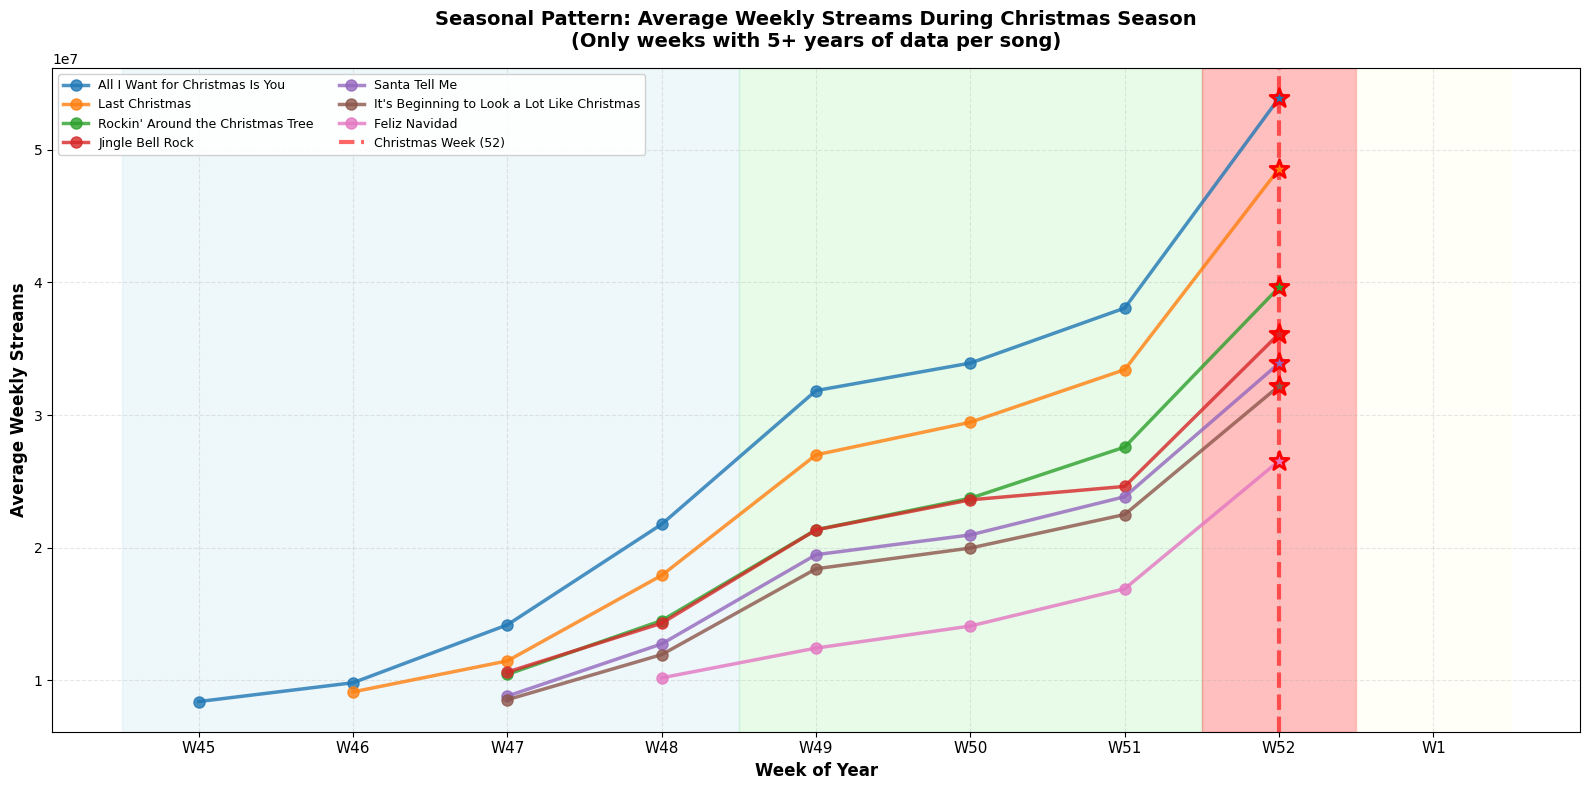

In [10]:
# Visualization: Average streams by week for each song (only weeks with data)
plt.figure(figsize=(16, 8))

songs = weekly_avg['track'].unique()
colors = plt.cm.tab10(range(len(songs)))

for idx, song in enumerate(songs):
    song_data = weekly_avg[weekly_avg['track'] == song]
    
    # Filter out weeks with very few data points (likely incomplete)
    song_season = christmas_season[christmas_season['track'] == song]
    week_counts = song_season.groupby('week_of_year').size()
    
    # Only plot weeks that appear at least 5 times across all years
    valid_weeks = week_counts[week_counts >= 5].index
    song_data_filtered = song_data[song_data['week_of_year'].isin(valid_weeks)]
    
    if len(song_data_filtered) > 0:
        x_positions = [week_order.index(w) for w in song_data_filtered['week_of_year']]
        plt.plot(x_positions, song_data_filtered['streams'], 
                 marker='o', markersize=8, linewidth=2.5, 
                 label=song, color=colors[idx], alpha=0.8)
        
        # Mark peak
        max_idx = song_data_filtered['streams'].idxmax()
        max_row = song_data_filtered.loc[max_idx]
        peak_week = max_row['week_of_year']
        peak_position = week_order.index(peak_week)
        plt.scatter(peak_position, max_row['streams'], 
                    color=colors[idx], s=200, marker='*', 
                    zorder=5, edgecolors='red', linewidths=2)

# Mark phases with vertical lines and background colors
plt.axvspan(-0.5, 3.5, color='lightblue', alpha=0.2)
plt.axvspan(3.5, 6.5, color='lightgreen', alpha=0.2)
plt.axvspan(6.5, 7.5, color='red', alpha=0.25)
plt.axvline(7, color='red', linewidth=3, linestyle='--', alpha=0.6, label='Christmas Week (52)')
plt.axvspan(7.5, 8.5, color='lightyellow', alpha=0.2)

plt.xticks(range(len(week_order)), [f'W{w}' for w in week_order], fontsize=11)
plt.xlabel('Week of Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Weekly Streams', fontsize=12, fontweight='bold')
plt.title('Seasonal Pattern: Average Weekly Streams During Christmas Season\n(Only weeks with 5+ years of data per song)', 
          fontsize=14, fontweight='bold', pad=15)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=9, ncol=2, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [11]:
# Identify peak week across all data
peak_week_analysis = christmas_season.groupby('week_of_year')['streams'].agg(['mean', 'max', 'count']).reset_index()
peak_week_analysis = peak_week_analysis.sort_values('mean', ascending=False)

print("Peak week analysis (sorted by average streams):")
print(peak_week_analysis)

max_week = peak_week_analysis.iloc[0]['week_of_year']
max_avg_streams = peak_week_analysis.iloc[0]['mean']

print(f"\n🎄 PEAK WEEK: Week {max_week} with average of {max_avg_streams/1e6:.1f}M streams")

# Find which song dominates each week
weekly_song_dominance = christmas_season.groupby(['week_of_year', 'track'])['streams'].mean().reset_index()
weekly_song_dominance = weekly_song_dominance.sort_values(['week_of_year', 'streams'], ascending=[True, False])
top_song_per_week = weekly_song_dominance.groupby('week_of_year').first().reset_index()

print("\nTop song per week:")
print(top_song_per_week[['week_of_year', 'track', 'streams']])

Peak week analysis (sorted by average streams):
   week_of_year          mean       max  count
8            52  3.869217e+07  92506541     56
7            51  2.670700e+07  53338897     56
6            50  2.368233e+07  47514211     55
5            49  2.170434e+07  48242745     55
4            48  1.501655e+07  33728604     59
3            47  1.083639e+07  21632325     46
2            46  9.153227e+06  14923197     27
0             1  8.890929e+06  11565422      5
1            45  8.702632e+06  11713143     10

🎄 PEAK WEEK: Week 52.0 with average of 38.7M streams

Top song per week:
   week_of_year                            track       streams
0             1                   Last Christmas  9.739742e+06
1            45                   Last Christmas  9.382804e+06
2            46  All I Want for Christmas Is You  9.828505e+06
3            47  All I Want for Christmas Is You  1.419391e+07
4            48  All I Want for Christmas Is You  2.177477e+07
5            49  All I Want fo